# **TRANSFER LEARNING**

# Montamos Carpeta en Google Drive

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/.NOTEBOOK'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/.NOTEBOOK


# Inicializo borrando todo para poder ejecutar nuevamente todo

In [ ]:
!rm -r ./cucharas
!rm -r ./cuchillos
!rm -r ./tenedores

!rm -r ./dataset

# Creamos las carpetas para subir las imágenes

In [ ]:
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

# Descromprimir un archivo .zip en cada carpeta

In [ ]:
%cd cuchillos
!unzip /content/drive/MyDrive/.NOTEBOOK/cuchillos.zip
%cd ..

%cd cucharas
!unzip /content/drive/MyDrive/.NOTEBOOK/cucharas.zip
%cd ..

%cd tenedores
!unzip /content/drive/MyDrive/.NOTEBOOK/tenedores.zip
%cd ..


/content/drive/My Drive/.NOTEBOOK/cuchillos
Archive:  /content/drive/MyDrive/.NOTEBOOK/cuchillos.zip
   creating: cuchillos/
  inflating: cuchillos/knife.1.jpg   
  inflating: cuchillos/knife.10.jpg  
  inflating: cuchillos/knife.11.jpg  
  inflating: cuchillos/knife.12.jpg  
  inflating: cuchillos/knife.13.jpg  
  inflating: cuchillos/knife.14.jpg  
  inflating: cuchillos/knife.15.jpg  
  inflating: cuchillos/knife.16.jpg  
  inflating: cuchillos/knife.17.jpg  
  inflating: cuchillos/knife.18.jpg  
  inflating: cuchillos/knife.2.jpg   
  inflating: cuchillos/knife.20.jpg  
  inflating: cuchillos/knife.21.jpg  
  inflating: cuchillos/knife.22.jpg  
  inflating: cuchillos/knife.23.jpg  
  inflating: cuchillos/knife.24.jpg  
  inflating: cuchillos/knife.25.jpg  
  inflating: cuchillos/knife.26.jpg  
  inflating: cuchillos/knife.27.jpg  
  inflating: cuchillos/knife.28.jpg  
  inflating: cuchillos/knife.29.jpg  
  inflating: cuchillos/knife.3.jpg   
  inflating: cuchillos/knife.30.jpg  
 

# Solucionamos problema de doble carpeta por ZIP y borro archivos ZIP

In [ ]:
!mv ./cucharas/cucharas/* ./cucharas
!mv ./cuchillos/cuchillos/* ./cuchillos
!mv ./tenedores/tenedores/* ./tenedores

!rmdir ./cucharas/cucharas
!rmdir ./cuchillos/cuchillos
!rmdir ./tenedores/tenedores

#!rm -rf /content/drive/MyDrive/.NOTEBOOK/cuchillos.zip
#!rm -rf /content/drive/MyDrive/.NOTEBOOK/cucharas.zip
#!rm -rf /content/drive/MyDrive/.NOTEBOOK/tenedores.zip


# Visualizamos cantidad e imágenes por categoría

In [ ]:
!ls ./cucharas/ | wc -l
!ls ./cuchillos/ | wc -l
!ls ./tenedores/ | wc -l

136
85
171


# Creamos carpetas para set de datos

In [ ]:
!mkdir dataset
!mkdir dataset/cuchillos
!mkdir dataset/cucharas
!mkdir dataset/tenedores

# Vamos a copiar 85 imágenes de cada categoria a las carpetas de dataset

In [ ]:
import shutil
import os

source_folder = './cucharas'
target_folder = './dataset/cucharas'

images = os.listdir(source_folder)

for i, img_name in enumerate(images):
  if i < 85:
    shutil.copy(source_folder + "/" + img_name, target_folder + "/" + img_name)

################################################################################

source_folder = './cuchillos'
target_folder = './dataset/cuchillos'

images = os.listdir(source_folder)

for i, img_name in enumerate(images):
  if i < 85:
    shutil.copy(source_folder + "/" + img_name, target_folder + "/" + img_name)

################################################################################

source_folder = './tenedores'
target_folder = './dataset/tenedores'

images = os.listdir(source_folder)

for i, img_name in enumerate(images):
  if i < 85:
    shutil.copy(source_folder + "/" + img_name, target_folder + "/" + img_name)


# Verificar cantidad de imágenes en cada data sets

In [ ]:

!ls /content/drive/MyDrive/.NOTEBOOK/dataset/cucharas | wc -l
!ls /content/drive/MyDrive/.NOTEBOOK/dataset/cuchillos | wc -l
!ls /content/drive/MyDrive/.NOTEBOOK/dataset/tenedores | wc -l


85
85
85


# Visualizar Cucharas, Cuchillos y Tenedores

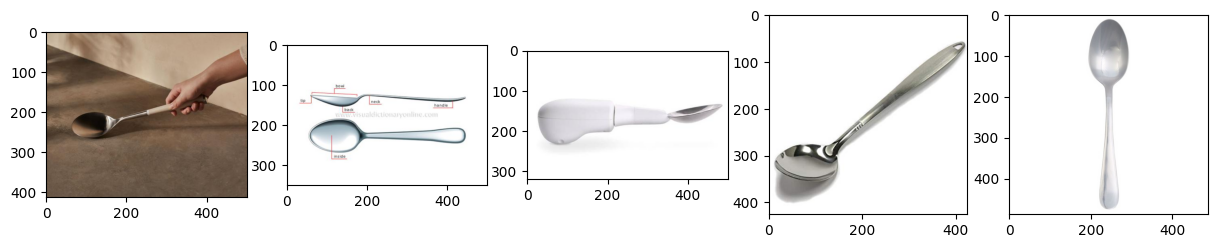

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15, 15))

folder = './dataset/cucharas'
images = os.listdir(folder)

for i, img_name in enumerate(images[:5]):
  plt.subplot (5, 5, i + 1)
  image = mpimg.imread(folder + "/" + img_name)
  plt.imshow(image)


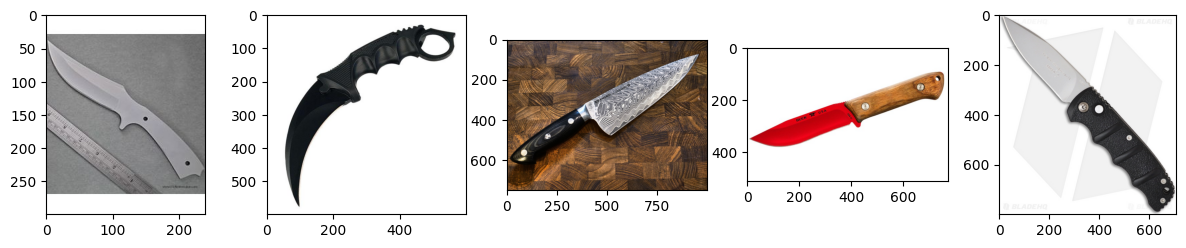

In [ ]:
plt.figure(figsize=(15, 15))

folder = './dataset/cuchillos'
images = os.listdir(folder)

for i, img_name in enumerate(images[:5]):
  plt.subplot (5, 5, i + 1)
  image = mpimg.imread(folder + "/" + img_name)
  plt.imshow(image)


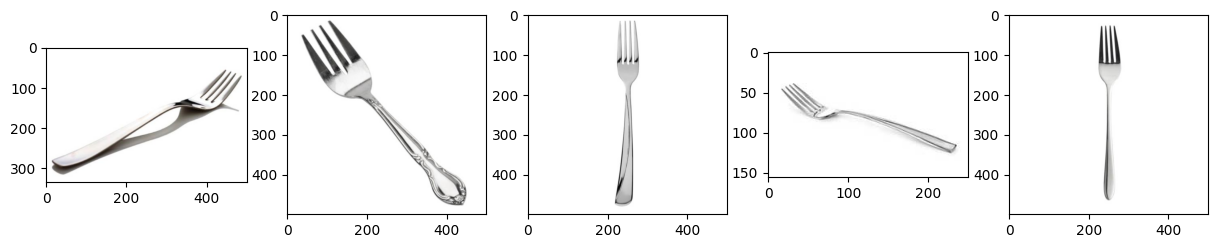

In [ ]:
plt.figure(figsize=(15, 15))

folder = './dataset/tenedores'
images = os.listdir(folder)

for i, img_name in enumerate(images[:5]):
  plt.subplot (5, 5, i + 1)
  image = mpimg.imread(folder + "/" + img_name)
  plt.imshow(image)


# Aumento de datos

In [ ]:
# Aumento de datos con ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Creamos el generador de datasets
datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range= 30,
    width_shift_range= 0.25,
    height_shift_range= 0.25,
    shear_range= 15,
    zoom_range= [0.5, 1.5],
    validation_split=0.2
)

data_gen_train = datagen.flow_from_directory('./dataset',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             shuffle=True,
                                             subset='training'

)
data_gen_test = datagen.flow_from_directory('./dataset',
                                             target_size=(224, 224),
                                             batch_size=32,
                                             shuffle=True,
                                             subset='validation'

)


Found 204 images belonging to 3 classes.
Found 51 images belonging to 3 classes.


# Vamos a Imprimir para ver

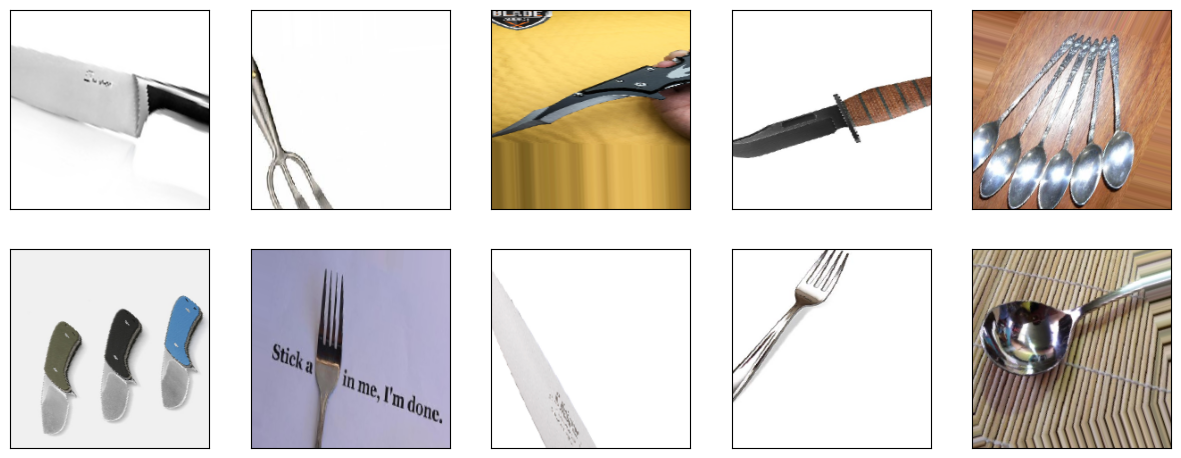

In [ ]:
# Imprimamos algunas de las imágenes del settrain

plt.figure(figsize=(15, 15))

for image, label in data_gen_train:
  for i in range(10):
    plt.subplot (5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()


# Podemos ir a Tensor Flow Hub para buscar modelos de clasificación

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
mobilenet_v2 = hub.KerasLayer(url, input_shape=(224, 224, 3))     # Prestar atención al tamaño de la imagen 224 x 224

# Congelamos el modelo.
mobilenet_v2.trainable = False


# Agregamos la capa de NN, uniendola a CNN que descargamos

In [ ]:
from keras import models, layers

model = models.Sequential ([
    mobilenet_v2,
    layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_1 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 3543271 (13.52 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


# Compilamos el Modelo

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamos el Modelo

In [ ]:
epochs = 2

history = model.fit(
    data_gen_train,
    epochs=epochs,
    batch_size=32,
    validation_data=data_gen_test
)

Epoch 1/2
7/7 [==============================] - 22s 2s/step - loss: 1.4727 - accuracy: 0.3873 - val_loss: 0.6850 - val_accuracy: 0.6863
Epoch 2/2
7/7 [==============================] - 15s 2s/step - loss: 0.7130 - accuracy: 0.7108 - val_loss: 0.4716 - val_accuracy: 0.8431


# Gráficas

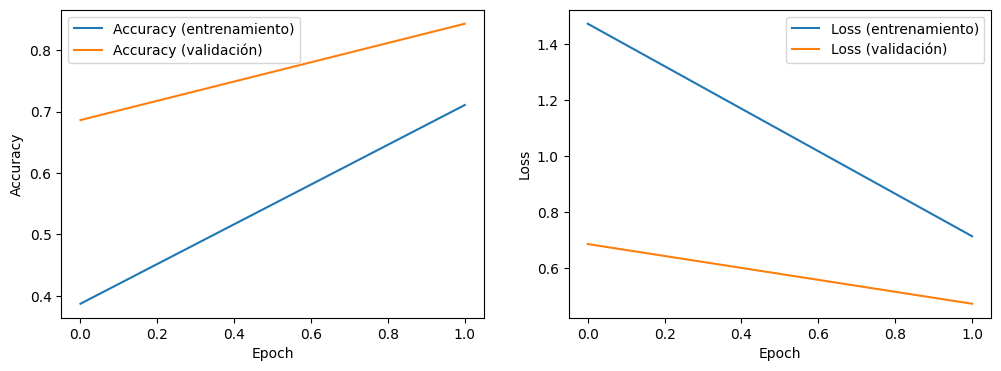

In [ ]:

# Gráficar el accuracy y el loss durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validación)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (validación)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Función de Predicción

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorize(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img = np.array(img).astype(float) / 255
  img = cv2.resize(img, (224, 224))
  prediction = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediction[0], axis=-1)

# Predecimos con Imágenes de la URL

In [ ]:
# 0: cuchara
# 1: cuchillo
# 2: tenedor

# Tiene que ver con el orden en el que se cargaron
# las carpetas en la carpeta dataset

#Pala
url = 'https://image.made-in-china.com/202f0j00YfeUbLuaVicB/Steel-Shovel-with-Wooden-Handle-for-Farming-Tools.jpg'
prediction = categorize(url)
print(prediction)

# Cuchillo
url = 'https://http2.mlstatic.com/D_NQ_NP_663241-MLA47584261786_092021-O.webp'
prediction = categorize(url)
print(prediction)

# Cuchillo con Verduras
url = 'https://www.lecuine.com/blog/wp-content/uploads/2014/04/los-mejores-cuchillos-chef.jpg'
prediction = categorize(url)
print(prediction)

# Cuchara Postre
url = 'https://cruzdemalta.es/wp-content/uploads/2021/06/cuchara-postre-6.jpg'
prediction = categorize(url)
print(prediction)


1/1 [==============================] - 1s 591ms/step
2
1/1 [==============================] - 0s 54ms/step
1
1/1 [==============================] - 0s 54ms/step
0
1/1 [==============================] - 0s 57ms/step
0


# Fin Práctica